# Excercise 10
This question should be answered using the Weekly data set, which
is part of the ISLR package. This data is similar in nature to the
Smarket data from this chapter’s lab, except that it contains 1, 089
weekly returns for 21 years, from the beginning of 1990 to the end of
2010.
(a) Produce some numerical and graphical summaries of the Weekly
data. Do there appear to be any patterns?
(b) Use the full data set to perform a logistic regression with
Direction as the response and the five lag variables plus Volume
as predictors. Use the summary function to print the results. Do
any of the predictors appear to be statistically significant? If so,
which ones?
(c) Compute the confusion matrix and overall fraction of correct
predictions. Explain what the confusion matrix is telling you
about the types of mistakes made by logistic regression.
(d) Now fit the logistic regression model using a training data period
from 1990 to 2008, with Lag2 as the only predictor. Compute the
confusion matrix and the overall fraction of correct predictions
for the held out data (that is, the data from 2009 and 2010).
(e) Repeat (d) using LDA.
(f) Repeat (d) using QDA.
(g) Repeat (d) using KNN with K = 1.
(h) Which of these methods appears to provide the best results on
this data?
(i) Experiment with different combinations of predictors, including
possible transformations and interactions, for each of the
methods. Report the variables, method, and associated confusion
matrix that appears to provide the best results on the held
out data. Note that you should also experiment with values for
K in the KNN classifier.

In [12]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.linear_model as skl_lm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.linear_model import LogisticRegression
from sklearn.lda import LDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

pd.set_option('display.notebook_repr_html', False)

%matplotlib inline
plt.style.use('seaborn-white')

/Library/Python/2.7/site-packages/sklearn/lda.py:4: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19
  "in 0.17 and will be removed in 0.19", DeprecationWarning)


In [3]:
weekly = pd.read_csv("data/weekly.csv")
weekly.head()

   Unnamed: 0  Year   Lag1   Lag2   Lag3   Lag4   Lag5    Volume  Today  \
0           1  1990  0.816  1.572 -3.936 -0.229 -3.484  0.154976 -0.270   
1           2  1990 -0.270  0.816  1.572 -3.936 -0.229  0.148574 -2.576   
2           3  1990 -2.576 -0.270  0.816  1.572 -3.936  0.159837  3.514   
3           4  1990  3.514 -2.576 -0.270  0.816  1.572  0.161630  0.712   
4           5  1990  0.712  3.514 -2.576 -0.270  0.816  0.153728  1.178   

  Direction  
0      Down  
1      Down  
2        Up  
3        Up  
4        Up  

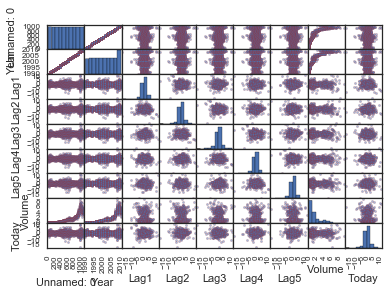

In [4]:
axes = pd.tools.plotting.scatter_matrix(weekly, color="brown")

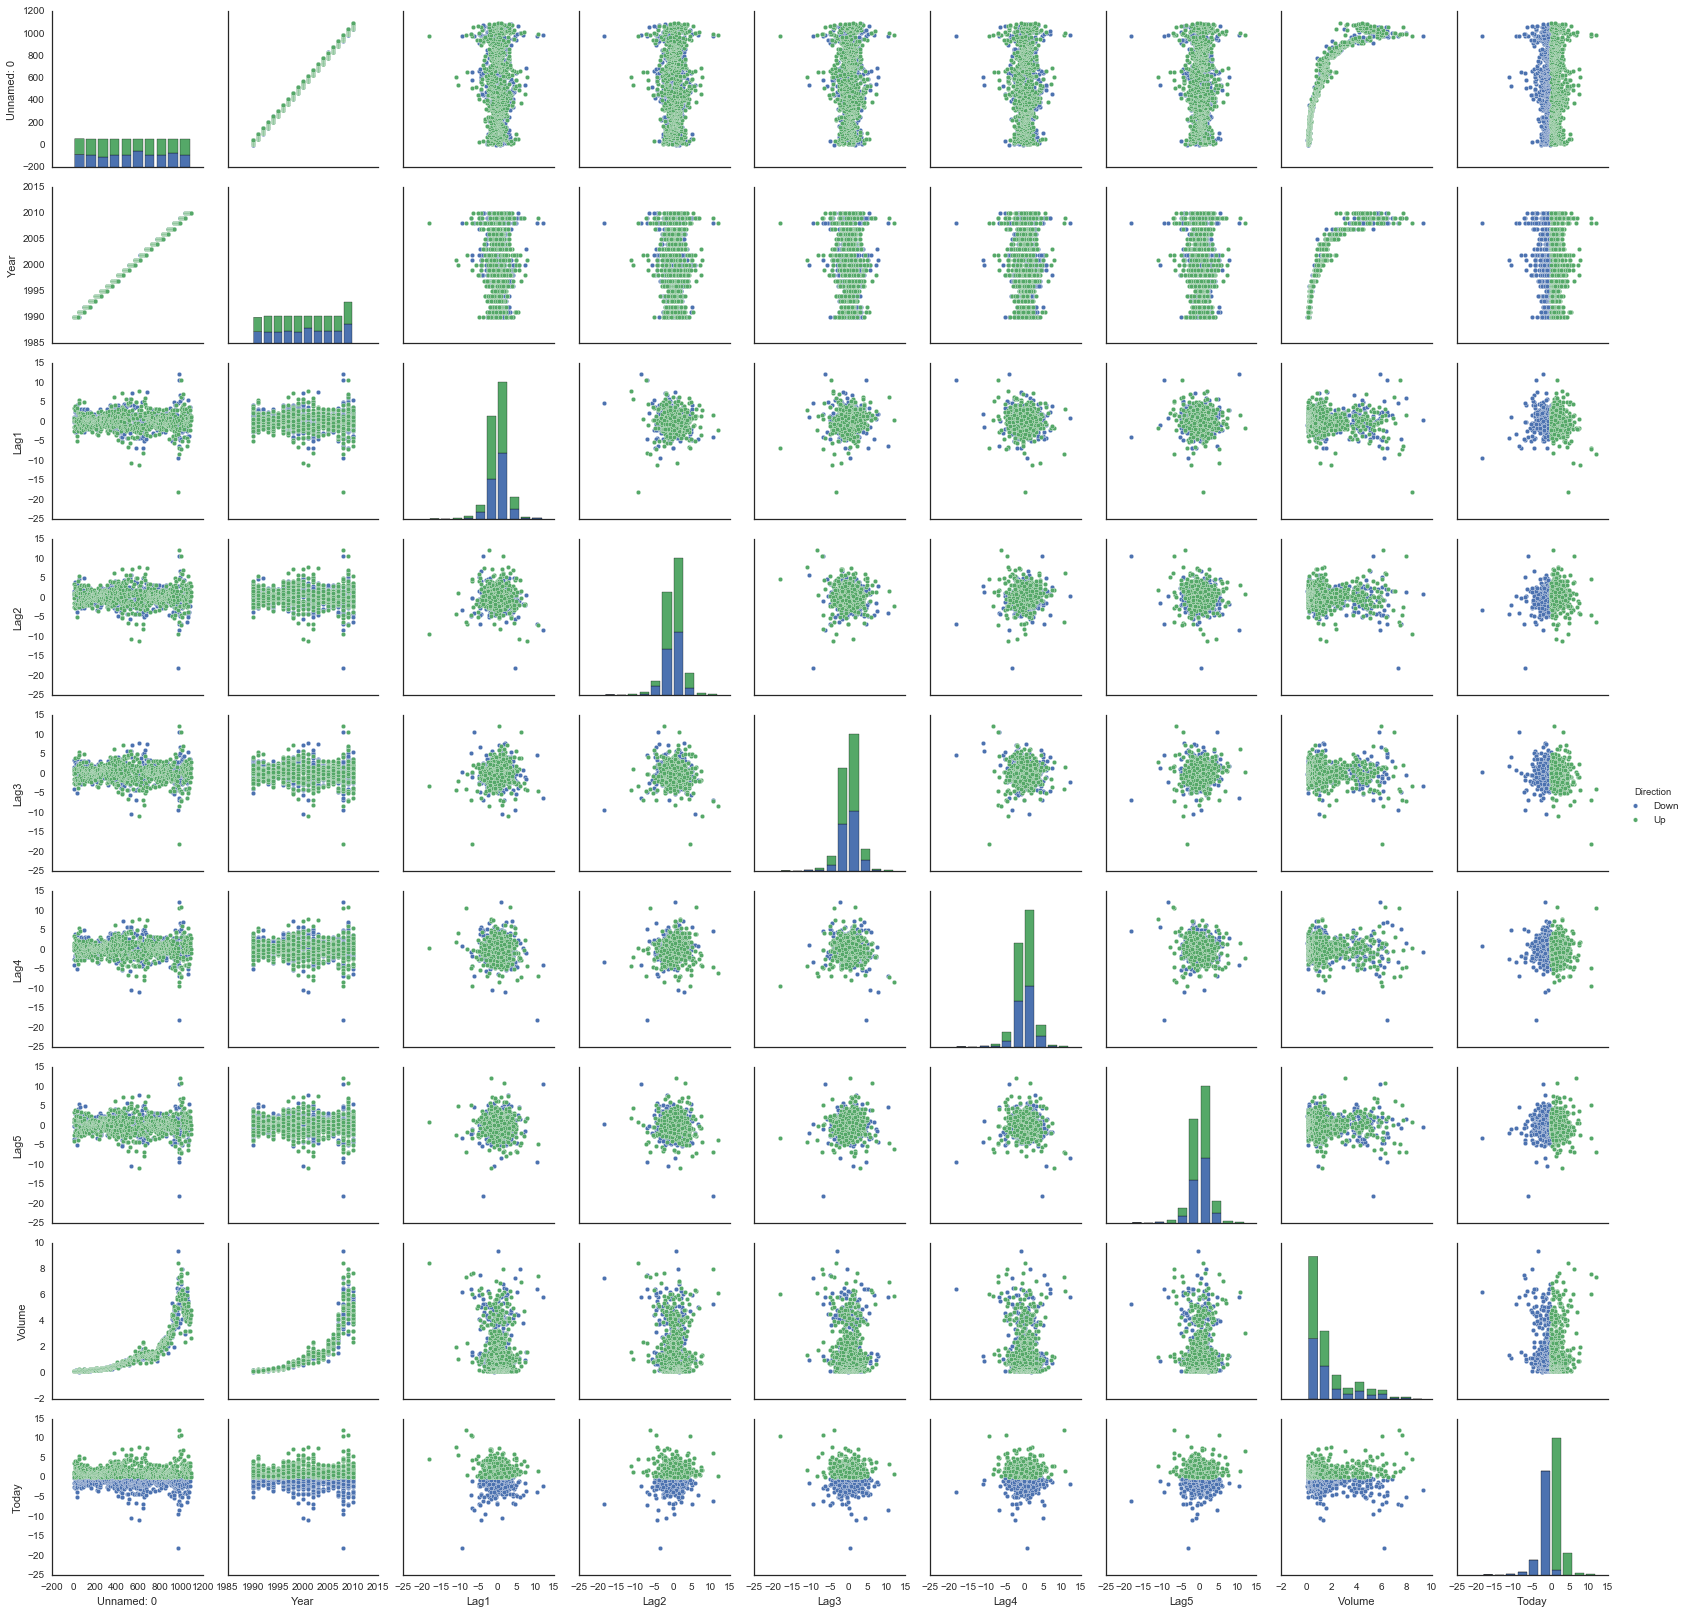

In [7]:
sns.pairplot(weekly, hue='Direction');

In [13]:
X = weekly[weekly.columns[1:-2]]
y = pd.factorize(weekly["Direction"])[0]
clf = LogisticRegression()
clf.fit(X, y)
(clf.intercept_, clf.coef_)

(array([  6.98253997e-05]),
 array([[ 0.00013344, -0.04139065,  0.0588156 , -0.01612161, -0.02809532,
         -0.01464937, -0.02278781]]))

In [14]:
# return probability for each class. R's predict() only returns the probability of the first 
# class, so we do the same.
probs = clf.predict_proba(X)
[prob[0] for prob in probs[0:5]]

[0.39133726439959127,
 0.39891358263941568,
 0.41264192403798838,
 0.51914683718554566,
 0.38308324877429545]

In [15]:
ypreds = ["Up" if prob[0] > 0.5 else "Down" for prob in probs]
ypreds[0:5]

['Down', 'Down', 'Down', 'Up', 'Down']

In [16]:
# R uses table() to tabulate the confusion matrix below
yacts = [str(x) for x in weekly["Direction"].values]
confusion_matrix(yacts, ypreds)

array([[429,  55],
       [557,  48]])

In [17]:
accuracy_score(yacts, ypreds)

0.43801652892561982

In [18]:
# Split dataset into training and test sets
weekly_train_df = weekly[weekly["Year"] <= 2008]
weekly_test_df = weekly[weekly["Year"] > 2008]

In [31]:
X = weekly_train_df[weekly_train_df.columns[2:3]]
X_test = weekly_test_df[weekly_test_df.columns[2:3]]
y = pd.factorize(weekly_train_df["Direction"])[0]
y_test = pd.factorize(weekly_test_df["Direction"])[0]
clf = LogisticRegression()
clf.fit(X, y)
(clf.intercept_, clf.coef_)

(array([ 0.21738039]), array([[-0.05899675]]))

In [29]:
probs = clf.predict_proba(X_test)
[prob[0] for prob in probs[0:5]]

[0.54523537791792487,
 0.38229984526354421,
 0.38132508847448721,
 0.41497011245309634,
 0.43525357959922817]

In [30]:
ypreds = ["Up" if prob[0] > 0.5 else "Down" for prob in probs]
ypreds[0:5]

['Up', 'Down', 'Down', 'Down', 'Down']

In [32]:
ypred = clf.predict(X_test)
confusion_matrix(y_test, ypred)

array([[ 4, 39],
       [ 6, 55]])

In [34]:
accuracy_score(y_test, ypred)

0.56730769230769229

In [37]:
# LDA
clf4 = LDA()
clf4.fit(X, y)
ypred = clf4.predict(X_test)
ypred[0:5]

array([0, 1, 1, 1, 1])

In [38]:
confusion_matrix(y_test, ypred)

array([[ 4, 39],
       [ 6, 55]])

In [55]:
# KNN

clf5 = KNeighborsClassifier(n_neighbors=2)
clf5.fit(X, y)
ypred = clf5.predict(X_test)
confusion_matrix(y_test, ypred)

array([[31, 12],
       [44, 17]])

In [56]:
accuracy_score(y_test, ypred)

0.46153846153846156

In [42]:
# QDA

qda = QuadraticDiscriminantAnalysis()
pred = qda.fit(X, y).predict(X_test)

In [43]:
qda.priors_

array([ 0.44771574,  0.55228426])

In [44]:
qda.means_

array([[ 0.28944444],
       [-0.00921324]])

In [45]:
confusion_matrix(y_test, pred).T

array([[ 0,  0],
       [43, 61]])

In [46]:
print(classification_report(y_test, pred, digits=3))

             precision    recall  f1-score   support

          0      0.000     0.000     0.000        43
          1      0.587     1.000     0.739        61

avg / total      0.344     0.587     0.434       104



/Library/Python/2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
